In [1]:
#@title Requirements

import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = [r'E:\Mini_Project\Review_1_data']

Found 1198 files belonging to 6 classes.
Batch classes for  Thaat_Kalyan  :  [5 0 2 3 1 4 2 3 1 3 2 5 5 4 4 2 2 2 2 2 5 4 1 2 3 3 4 0 0 3 4 0] 

Found 698 files belonging to 5 classes.
Batch classes for  Thaat_Khamaj  :  [3 2 3 2 1 4 4 3 3 3 3 0 3 1 0 0 1 1 0 1 4 0 2 1 1 2 0 3 2 4 3 3] 



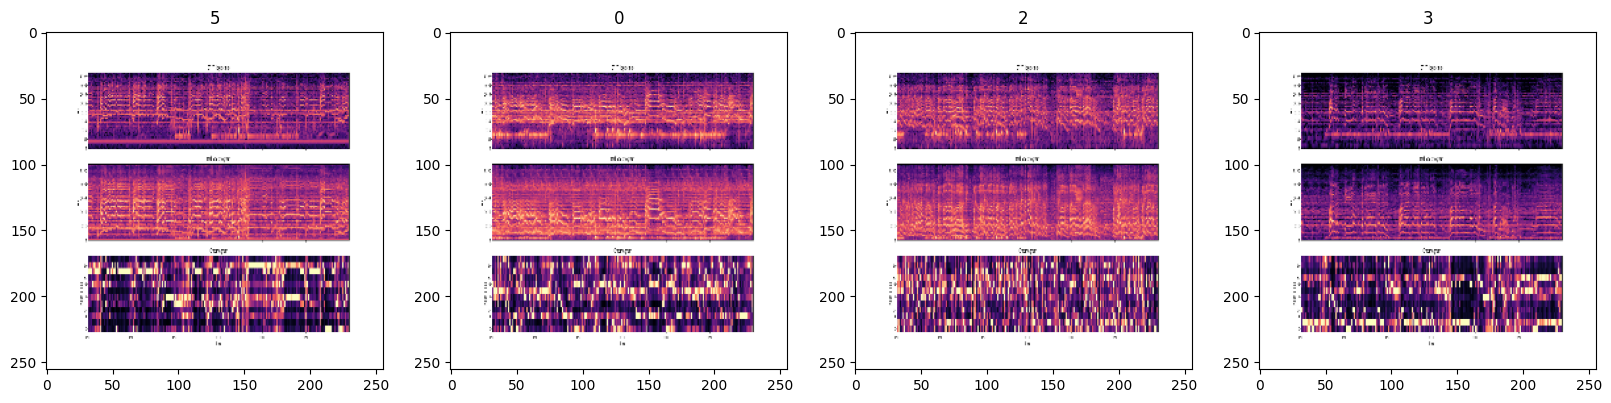

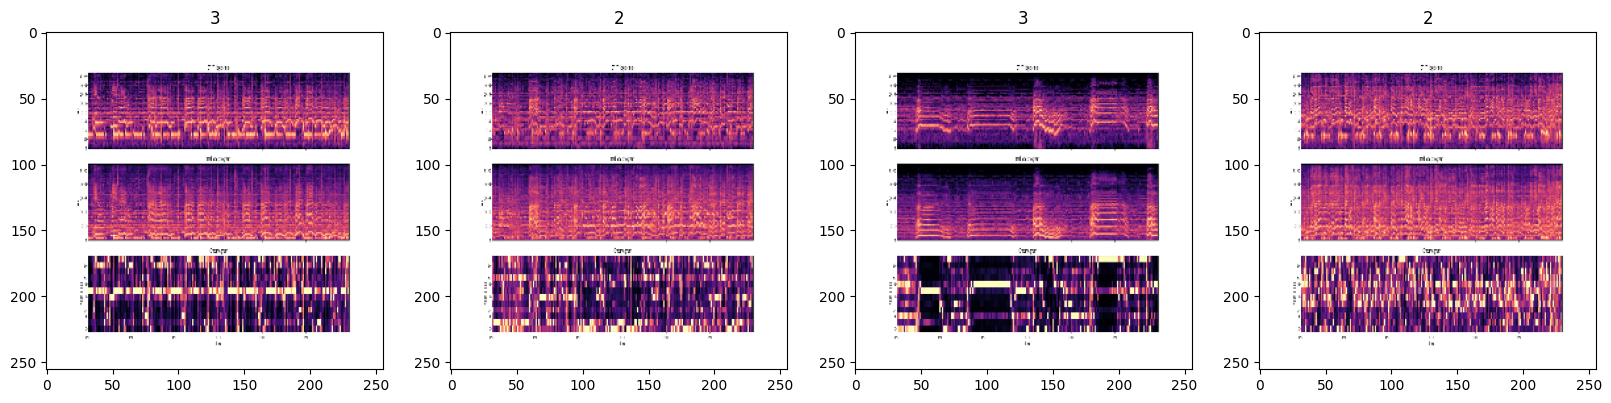

In [3]:
#@title Creating Data Pipeline

import numpy as np

# data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/Raga Identification/data', shuffle=True)
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()
# print("Batch 1 classes: ", batch[1], "\n")
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

datas = {}
data_iterators = {}
batches = {}
#for i in os.listdir(data_dir[0]):
thaats = ['Thaat_Kalyan','Thaat_Khamaj']
for i in thaats:
    datas[i] = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir[0], i), shuffle=True)
    data_iterators[i] = datas[i].as_numpy_iterator()
    batches[i] = data_iterators[i].next()
    print("Batch classes for ", i, " : ", batches[i][1], "\n")
    fig, ax = plt.subplots(ncols=4, figsize=(20,20))
    for idx, img in enumerate(batches[i][0][:4]):
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batches[i][1][idx])

In [4]:
#@title Preprocessing Data

''' Scaling Data '''
# # Scaling Data
# data = data.map(lambda x,y: (x/255, y))
# data.as_numpy_iterator().next()[0].max()

#for i in os.listdir(data_dir[0]):
thaats = ['Thaat_Kalyan','Thaat_Khamaj']
for i in thaats:
    datas[i] = datas[i].map(lambda x,y: (x/255, y))
    print("For "+i+": ", datas[i].as_numpy_iterator().next()[0].max())
    

# ''' Splitting Data '''
# train_size = int(len(data)*.8)
# val_size = int(len(data)*.1)+1
# test_size = int(len(data)*.1)+1

# train = data.take(train_size)
# val = data.take(val_size)
# test = data.take(test_size)

trains = {}
tests = {}
vals = {}
#for i in os.listdir(data_dir[0]):

for i in thaats:
    train_size = int(len(datas[i])*.8)
    val_size = int(len(datas[i])*.1)+1
    test_size = int(len(datas[i])*.1)+1
    print("For "+i+" : ", train_size, " + ", val_size, " + ", test_size, " = ", len(datas[i]))

    trains[i] = datas[i].take(train_size)
    vals[i] = datas[i].take(val_size)
    tests[i] = datas[i].take(test_size)
    

For Thaat_Kalyan:  1.0
For Thaat_Khamaj:  1.0
For Thaat_Kalyan :  30  +  4  +  4  =  38
For Thaat_Khamaj :  17  +  3  +  3  =  22


In [5]:
#@title Assigning weights to classes
from sklearn.utils.class_weight import compute_class_weight

# labels = []
# for batch in train.as_numpy_iterator():
#     X1, y1 = batch
#     labels.extend(list(y1))

# labels = np.array(labels)
# print(labels)

# # Calculate class weights for thaat classes
# class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(labels), y = labels)
# class_weights = dict(zip(np.unique(labels), class_weights))


class_weights_r = {}
#for i in os.listdir(data_dir[0]):
thaats = ['Thaat_Kalyan','Thaat_Khamaj']
for i in thaats:
    labels = []
    for batch in trains[i].as_numpy_iterator():
        X1, y1 = batch
        labels.extend(list(y1))

    labels = np.array(labels)
    print("For", i, ":", labels)

    # Calculate class weights for thaat classes
    class_weights_r[i] = compute_class_weight(class_weight = 'balanced', classes = np.unique(labels), y = labels)
    class_weights_r[i] = dict(zip(np.unique(labels), class_weights_r[i]))

For Thaat_Kalyan : [5 4 0 3 1 5 5 3 5 1 0 3 1 0 4 5 2 4 3 0 2 5 0 2 5 0 0 5 4 5 4 3 2 1 4 1 0
 4 3 3 0 3 2 3 3 4 2 3 4 5 2 5 2 2 3 5 5 1 4 0 2 3 1 2 4 2 4 0 5 5 5 5 2 5
 2 0 3 3 2 4 0 5 5 0 3 3 4 3 2 3 2 3 0 5 1 3 4 3 2 0 0 0 4 2 4 3 5 4 2 5 3
 5 0 3 1 0 4 3 3 5 3 1 5 5 3 0 0 0 5 5 2 2 3 2 4 2 5 4 1 2 0 4 3 2 1 5 3 1
 1 5 5 5 4 5 3 3 1 4 0 3 5 2 4 0 3 1 0 2 2 3 3 3 3 3 4 2 4 0 5 2 5 5 3 0 3
 3 1 5 1 3 5 5 3 5 4 2 0 2 2 5 5 2 4 3 5 2 1 2 4 5 5 5 0 5 5 3 2 0 3 3 3 1
 0 3 1 3 5 3 4 3 5 5 2 0 3 5 2 5 4 3 0 5 4 3 5 5 5 5 0 5 5 3 0 0 4 3 3 4 2
 4 0 1 3 1 5 5 1 2 2 2 0 3 4 2 0 2 3 1 0 0 5 5 4 0 4 0 0 0 5 1 4 5 1 0 4 5
 0 3 3 0 3 3 2 2 5 4 5 2 0 2 0 2 2 5 3 3 3 1 4 5 0 5 5 5 2 4 5 1 2 2 1 2 3
 3 3 1 3 1 2 2 5 1 2 4 4 2 3 3 2 1 5 4 1 3 2 1 3 1 2 0 3 2 4 0 0 4 4 2 3 0
 3 0 3 5 5 1 3 3 3 5 3 3 2 3 1 1 3 0 5 0 4 0 0 3 3 0 1 2 3 3 4 5 2 0 0 3 4
 3 3 0 3 3 5 0 0 5 2 5 2 0 2 0 5 5 4 0 5 4 3 5 5 4 4 0 3 2 5 2 5 5 3 4 3 3
 3 4 1 4 0 2 4 1 0 1 2 3 3 2 4 1 3 5 0 0 0 2 4 2 5 4 3 1 2 2 4 3 3 5 3 4 5
 3 2 5

In [3]:
#@title Deep Models CRNN2D, DenseNet

''' Deep Model '''
# The Network
import keras.backend as K
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D, Concatenate, GlobalAveragePooling2D, BatchNormalization, ReLU, Add, SeparableConv2D, DepthwiseConv2D, GRU, LSTM, Permute, Reshape, Activation
from tensorflow.keras.applications import DenseNet201


def CRNN2D(X_shape, nb_classes):

    nb_layers = 4
    nb_filters = [64, 128, 128, 128]
    kernel_size = (3, 3)
    activation = 'elu'
    pool_size = [(2, 2), (4, 2), (4, 2), (4, 2),
                 (4, 2)]

    input_shape = (X_shape[0], X_shape[1], X_shape[2])
    frequency_axis = 1
    time_axis = 2
    channel_axis = 3

    model = Sequential()
    model.add(BatchNormalization(axis=frequency_axis, input_shape=input_shape))

    model.add(Conv2D(nb_filters[0], kernel_size=kernel_size, padding='same',
                     data_format="channels_last",
                     input_shape=input_shape))
    model.add(Activation(activation))
    model.add(BatchNormalization(axis=channel_axis))
    model.add(MaxPool2D(pool_size=pool_size[0], strides=pool_size[0]))
    model.add(Dropout(0.1))

    for layer in range(nb_layers - 1):
        model.add(Conv2D(nb_filters[layer + 1], kernel_size=kernel_size,
                         padding='same'))
        model.add(Activation(activation))
        model.add(BatchNormalization(
            axis=channel_axis))
        model.add(MaxPool2D(pool_size=pool_size[layer + 1],
                               strides=pool_size[layer + 1]))
        model.add(Dropout(0.1))


    model.add(Permute((time_axis, frequency_axis, channel_axis)))
    resize_shape = model.output_shape[2] * model.output_shape[3]
    model.add(Reshape((model.output_shape[1], resize_shape)))

    model.add(GRU(32, return_sequences=True))
    model.add(GRU(32, return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(nb_classes))
    model.add(Activation("softmax"))
    return model


def densenet(img_shape, n_classes):
    densenet = DenseNet201(input_shape=img_shape, include_top=False, weights='imagenet')
    densenet.trainable = False

    input = Input(img_shape)
    x = densenet(input, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate = 0.2)(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)
    return model



input_shape = (256, 256, 3)
n_classes = len(os.listdir(data_dir[0]))

model = CRNN2D(input_shape, n_classes)
model.compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# models = {}
# #for i in os.listdir(data_dir[0]):
# thaats = ['Thaat_Kalyan','Thaat_Khamaj']
# for i in thaats:
#     n_classes = len(os.listdir(os.path.join(data_dir[0], i)))
#     models[i] = densenet(input_shape, n_classes)
#     models[i].compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     models[i].summary()
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 256, 256, 3)       1024      
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 activation (Activation)     (None, 256, 256, 64)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                        

In [8]:
#@title Training the Models

# Train
logdir= r'E:\Mini_Project\Review_1_logs'
# tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
# hist = model.fit(train, class_weight=class_weights, epochs=60, validation_data=val, callbacks=[tensorboard_callback1, tensorboard_callback2])
# print(hist.history)

hists = {}
for x in range(1):
    i = "Thaat_Asavari"
    print("\n\n For "+i)
    tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
    hists[i] = models[i].fit(trains[i], class_weight = class_weights_r[i], epochs=60, validation_data=vals[i], callbacks=[tensorboard_callback1, tensorboard_callback2])
    print(hists[i].history)




 For Thaat_Asavari
Epoch 1/60
22/22 [==============================] - 230s 9s/step - loss: 1.7863 - accuracy: 0.2997 - val_loss: 1.2507 - val_accuracy: 0.5521
Epoch 2/60
22/22 [==============================] - 200s 9s/step - loss: 1.2647 - accuracy: 0.5071 - val_loss: 1.0601 - val_accuracy: 0.6875
Epoch 3/60
22/22 [==============================] - 200s 9s/step - loss: 1.0430 - accuracy: 0.5994 - val_loss: 0.9821 - val_accuracy: 0.6667
Epoch 4/60
22/22 [==============================] - 192s 9s/step - loss: 0.9212 - accuracy: 0.6875 - val_loss: 0.8242 - val_accuracy: 0.7188
Epoch 5/60
22/22 [==============================] - 200s 9s/step - loss: 0.8733 - accuracy: 0.6818 - val_loss: 0.7459 - val_accuracy: 0.8125
Epoch 6/60
22/22 [==============================] - 196s 9s/step - loss: 0.7361 - accuracy: 0.7514 - val_loss: 0.5833 - val_accuracy: 0.8021
Epoch 7/60
22/22 [==============================] - 203s 9s/step - loss: 0.6580 - accuracy: 0.7798 - val_loss: 0.4397 - val_accuracy:

In [9]:
#@title Saving the Models and their Histories

# Saving Model

#model.save(os.path.join('/content/drive/My Drive/Raga Identification/models','crnn2d_thaatclassifier.h5'))

for x in range(1):
    i = "Thaat_Asavari"
    filename = i+".h5"
    models[i].save(os.path.join('E:\Mini_Project\Review_1_model',filename))
    break

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
#@title Training the Models

# Train
logdir=r'E:\Mini_Project\Review_1_logs'
# tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
# hist = model.fit(train, class_weight=class_weights, epochs=60, validation_data=val, callbacks=[tensorboard_callback1, tensorboard_callback2])
# print(hist.history)

hists = {}
for x in range(1):
    i = "Thaat_Bhairav"
    print("\n\n For "+i)
    tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
    hists[i] = models[i].fit(trains[i], class_weight = class_weights_r[i], epochs=60, validation_data=vals[i], callbacks=[tensorboard_callback1, tensorboard_callback2])
    print(hists[i].history)




 For Thaat_Bhairav
Epoch 1/60
26/26 [==============================] - 247s 9s/step - loss: 1.8962 - accuracy: 0.2740 - val_loss: 1.4726 - val_accuracy: 0.4688
Epoch 2/60
26/26 [==============================] - 225s 8s/step - loss: 1.4003 - accuracy: 0.5024 - val_loss: 1.2003 - val_accuracy: 0.5859
Epoch 3/60
26/26 [==============================] - 223s 8s/step - loss: 1.1677 - accuracy: 0.5889 - val_loss: 0.8838 - val_accuracy: 0.7109
Epoch 4/60
26/26 [==============================] - 223s 8s/step - loss: 1.0814 - accuracy: 0.6298 - val_loss: 0.9031 - val_accuracy: 0.7188
Epoch 5/60
26/26 [==============================] - 223s 8s/step - loss: 0.9204 - accuracy: 0.6875 - val_loss: 0.6884 - val_accuracy: 0.7500
Epoch 6/60
26/26 [==============================] - 223s 8s/step - loss: 0.8671 - accuracy: 0.7031 - val_loss: 0.6655 - val_accuracy: 0.8047
Epoch 7/60
26/26 [==============================] - 222s 8s/step - loss: 0.7273 - accuracy: 0.7584 - val_loss: 0.4748 - val_accuracy:

In [9]:
#@title Saving the Models and their Histories

# Saving Model

#model.save(os.path.join('/content/drive/My Drive/Raga Identification/models','crnn2d_thaatclassifier.h5'))

for x in range(1):
    i = "Thaat_Bhairav"
    filename = i+".h5"
    models[i].save(os.path.join('E:\Mini_Project\Review_1_model',filename))
    break

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
#@title Training the Models

# Train
logdir=r'E:\Mini_Project\Review_1_logs'
# tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
# hist = model.fit(train, class_weight=class_weights, epochs=60, validation_data=val, callbacks=[tensorboard_callback1, tensorboard_callback2])
# print(hist.history)

hists = {}
for x in range(1):
    i = "Thaat_Bhairavi"
    print("\n\n For "+i)
    tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
    hists[i] = models[i].fit(trains[i], class_weight = class_weights_r[i], epochs=60, validation_data=vals[i], callbacks=[tensorboard_callback1, tensorboard_callback2])
    print(hists[i].history)

    filename = i+".h5"
    models[i].save(os.path.join('E:\Mini_Project\Review_1_model',filename))




 For Thaat_Bhairavi
Epoch 1/60
24/24 [==============================] - 229s 9s/step - loss: 1.6766 - accuracy: 0.3307 - val_loss: 1.9198 - val_accuracy: 0.3438
Epoch 2/60
24/24 [==============================] - 207s 8s/step - loss: 1.2355 - accuracy: 0.4870 - val_loss: 1.2157 - val_accuracy: 0.4922
Epoch 3/60
24/24 [==============================] - 207s 8s/step - loss: 1.1222 - accuracy: 0.5260 - val_loss: 0.8046 - val_accuracy: 0.7422
Epoch 4/60
24/24 [==============================] - 207s 8s/step - loss: 0.8987 - accuracy: 0.6602 - val_loss: 0.8315 - val_accuracy: 0.7031
Epoch 5/60
24/24 [==============================] - 207s 8s/step - loss: 0.8862 - accuracy: 0.6497 - val_loss: 0.6174 - val_accuracy: 0.8281
Epoch 6/60
24/24 [==============================] - 208s 8s/step - loss: 0.8518 - accuracy: 0.6745 - val_loss: 0.6752 - val_accuracy: 0.7656
Epoch 7/60
24/24 [==============================] - 205s 8s/step - loss: 0.7380 - accuracy: 0.7135 - val_loss: 0.6156 - val_accuracy

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
#@title Training the Models

# Train
logdir=r'E:\Mini_Project\Review_1_logs'
# tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
# hist = model.fit(train, class_weight=class_weights, epochs=60, validation_data=val, callbacks=[tensorboard_callback1, tensorboard_callback2])
# print(hist.history)

hists = {}
for x in range(1):
    i = "Thaat_Bilawal"
    print("\n\n For "+i)
    tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
    hists[i] = models[i].fit(trains[i], class_weight = class_weights_r[i], epochs=60, validation_data=vals[i], callbacks=[tensorboard_callback1, tensorboard_callback2])
    print(hists[i].history)

    filename = i+".h5"
    models[i].save(os.path.join('E:\Mini_Project\Review_1_model',filename))




 For Thaat_Bilawal
Epoch 1/60
31/31 [==============================] - 332s 10s/step - loss: 2.0148 - accuracy: 0.2339 - val_loss: 1.5932 - val_accuracy: 0.4297
Epoch 2/60
31/31 [==============================] - 317s 10s/step - loss: 1.5796 - accuracy: 0.4385 - val_loss: 1.2747 - val_accuracy: 0.6641
Epoch 3/60
31/31 [==============================] - 308s 10s/step - loss: 1.3210 - accuracy: 0.5302 - val_loss: 1.1565 - val_accuracy: 0.6250
Epoch 4/60
31/31 [==============================] - 305s 10s/step - loss: 1.1362 - accuracy: 0.6169 - val_loss: 0.9881 - val_accuracy: 0.7578
Epoch 5/60
31/31 [==============================] - 330s 10s/step - loss: 0.9628 - accuracy: 0.6905 - val_loss: 0.8186 - val_accuracy: 0.7734
Epoch 6/60
31/31 [==============================] - 285s 9s/step - loss: 0.9238 - accuracy: 0.6583 - val_loss: 0.7345 - val_accuracy: 0.7656
Epoch 7/60
31/31 [==============================] - 378s 12s/step - loss: 0.8685 - accuracy: 0.6855 - val_loss: 0.6285 - val_acc

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
#@title Training the Models

# Train
logdir=r'E:\Mini_Project\Review_1_logs'
# tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
# hist = model.fit(train, class_weight=class_weights, epochs=60, validation_data=val, callbacks=[tensorboard_callback1, tensorboard_callback2])
# print(hist.history)

hists = {}
thaats = ['Thaat_Marwa','Thaat_Purvi','Thaat_Todi']
for i in thaats:
    print("\n\n For "+i)
    tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
    hists[i] = models[i].fit(trains[i], class_weight = class_weights_r[i], epochs=60, validation_data=vals[i], callbacks=[tensorboard_callback1, tensorboard_callback2])
    print(hists[i].history)

    filename = i+".h5"
    models[i].save(os.path.join('E:\Mini_Project\Review_1_model',filename))




 For Thaat_Marwa
Epoch 1/60
18/18 [==============================] - 179s 9s/step - loss: 1.7681 - accuracy: 0.3438 - val_loss: 1.1027 - val_accuracy: 0.6042
Epoch 2/60
18/18 [==============================] - 167s 9s/step - loss: 1.1167 - accuracy: 0.5868 - val_loss: 0.8645 - val_accuracy: 0.7604
Epoch 3/60
18/18 [==============================] - 168s 9s/step - loss: 0.8149 - accuracy: 0.7170 - val_loss: 0.5969 - val_accuracy: 0.8854
Epoch 4/60
18/18 [==============================] - 187s 10s/step - loss: 0.6727 - accuracy: 0.7656 - val_loss: 0.5014 - val_accuracy: 0.8333
Epoch 5/60
18/18 [==============================] - 193s 10s/step - loss: 0.5490 - accuracy: 0.8212 - val_loss: 0.4089 - val_accuracy: 0.8854
Epoch 6/60
18/18 [==============================] - 183s 10s/step - loss: 0.5008 - accuracy: 0.8490 - val_loss: 0.3915 - val_accuracy: 0.8750
Epoch 7/60
18/18 [==============================] - 176s 10s/step - loss: 0.4617 - accuracy: 0.8455 - val_loss: 0.3768 - val_accurac

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




 For Thaat_Purvi
Epoch 1/60
34/34 [==============================] - 373s 10s/step - loss: 2.0098 - accuracy: 0.2086 - val_loss: 1.5644 - val_accuracy: 0.5750
Epoch 2/60
34/34 [==============================] - 354s 10s/step - loss: 1.5164 - accuracy: 0.4357 - val_loss: 1.2333 - val_accuracy: 0.6125
Epoch 3/60
34/34 [==============================] - 337s 10s/step - loss: 1.2039 - accuracy: 0.5414 - val_loss: 1.0991 - val_accuracy: 0.6250
Epoch 4/60
34/34 [==============================] - 293s 8s/step - loss: 1.0606 - accuracy: 0.6186 - val_loss: 0.9177 - val_accuracy: 0.7312
Epoch 5/60
34/34 [==============================] - 291s 8s/step - loss: 0.8961 - accuracy: 0.6654 - val_loss: 0.7762 - val_accuracy: 0.7437
Epoch 6/60
34/34 [==============================] - 293s 8s/step - loss: 0.8748 - accuracy: 0.6756 - val_loss: 0.7825 - val_accuracy: 0.7312
Epoch 7/60
34/34 [==============================] - 295s 9s/step - loss: 0.7384 - accuracy: 0.7206 - val_loss: 0.5551 - val_accuracy

In [7]:
#@title Training the Models

# Train
logdir=r'E:\Mini_Project\Review_1_logs'
# tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
# hist = model.fit(train, class_weight=class_weights, epochs=60, validation_data=val, callbacks=[tensorboard_callback1, tensorboard_callback2])
# print(hist.history)

hists = {}
thaats = ['Thaat_Kalyan','Thaat_Khamaj']
for i in thaats:
    print("\n\n For "+i)
    tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    tensorboard_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0010, patience=5, verbose=1, mode='max', restore_best_weights=True, start_from_epoch=5)
    hists[i] = models[i].fit(trains[i], class_weight = class_weights_r[i], epochs=60, validation_data=vals[i], callbacks=[tensorboard_callback1, tensorboard_callback2])
    print(hists[i].history)

    filename = i+".h5"
    models[i].save(os.path.join('E:\Mini_Project\Review_1_model',filename))




 For Thaat_Kalyan
Epoch 1/60
30/30 [==============================] - 289s 9s/step - loss: 1.8462 - accuracy: 0.2583 - val_loss: 1.4593 - val_accuracy: 0.4453
Epoch 2/60
30/30 [==============================] - 266s 9s/step - loss: 1.3532 - accuracy: 0.4802 - val_loss: 1.2100 - val_accuracy: 0.5781
Epoch 3/60
30/30 [==============================] - 282s 9s/step - loss: 1.1685 - accuracy: 0.5708 - val_loss: 1.1010 - val_accuracy: 0.6172
Epoch 4/60
30/30 [==============================] - 290s 9s/step - loss: 1.0891 - accuracy: 0.5948 - val_loss: 0.9948 - val_accuracy: 0.7031
Epoch 5/60
30/30 [==============================] - 258s 8s/step - loss: 0.9612 - accuracy: 0.6521 - val_loss: 0.8628 - val_accuracy: 0.7188
Epoch 6/60
30/30 [==============================] - 341s 11s/step - loss: 0.8617 - accuracy: 0.6792 - val_loss: 0.7384 - val_accuracy: 0.7422
Epoch 7/60
30/30 [==============================] - 465s 15s/step - loss: 0.8685 - accuracy: 0.6750 - val_loss: 1.1060 - val_accuracy

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




 For Thaat_Khamaj
Epoch 1/60
17/17 [==============================] - 191s 10s/step - loss: 1.8097 - accuracy: 0.2868 - val_loss: 1.5130 - val_accuracy: 0.5104
Epoch 2/60
17/17 [==============================] - 159s 9s/step - loss: 1.2851 - accuracy: 0.5018 - val_loss: 1.1629 - val_accuracy: 0.5938
Epoch 3/60
17/17 [==============================] - 158s 9s/step - loss: 1.0939 - accuracy: 0.5864 - val_loss: 0.9077 - val_accuracy: 0.6875
Epoch 4/60
17/17 [==============================] - 164s 9s/step - loss: 0.9141 - accuracy: 0.6746 - val_loss: 0.8128 - val_accuracy: 0.7500
Epoch 5/60
17/17 [==============================] - 169s 10s/step - loss: 0.8462 - accuracy: 0.7040 - val_loss: 0.5417 - val_accuracy: 0.8229
Epoch 6/60
17/17 [==============================] - 168s 10s/step - loss: 0.6880 - accuracy: 0.7408 - val_loss: 0.5938 - val_accuracy: 0.8229
Epoch 7/60
17/17 [==============================] - 169s 10s/step - loss: 0.6230 - accuracy: 0.7886 - val_loss: 0.5041 - val_accura